Name: Sree Swiya Yarlagadda

Github Username: https://github.com/swiyasree

USC ID: 4295-5564-10

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sms
import matplotlib.pyplot as plt

----------------------------------------------------------------------------------------------------------------------------------
(a) Download the Combined Cycle Power Plant data1 from: https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

In [6]:
data = pd.read_excel('CCPP/Folds5x2_pp.xlsx')
print(data)                  

         AT      V       AP     RH      PE
0     14.96  41.76  1024.07  73.17  463.26
1     25.18  62.96  1020.04  59.08  444.37
2      5.11  39.40  1012.16  92.14  488.56
3     20.86  57.32  1010.24  76.64  446.48
4     10.82  37.50  1009.23  96.62  473.90
...     ...    ...      ...    ...     ...
9563  16.65  49.69  1014.01  91.00  460.03
9564  13.19  39.18  1023.67  66.78  469.62
9565  31.32  74.33  1012.92  36.48  429.57
9566  24.48  69.45  1013.86  62.39  435.74
9567  21.60  62.52  1017.23  67.87  453.28

[9568 rows x 5 columns]


----------------------------------------------------------------------------------------------------------------------------------
(b) Exploring the data:
i. How many rows are in this data set? How many columns? What do the rows and columns represent?

In [7]:
rows = data.shape[0]
cols = data.shape[1]
print('No of rows: ', rows)
print()
print('No of cols: ', cols)
print()
print('Rows and columns description:')
print(data.head())

No of rows:  9568

No of cols:  5

Rows and columns description:
      AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90


----------------------------------------------------------------------------------------------------------------------------------
ii. Make pairwise scatterplots of all the varianbles in the data set including the predictors (independent variables) with the dependent variable. Describe your findings.

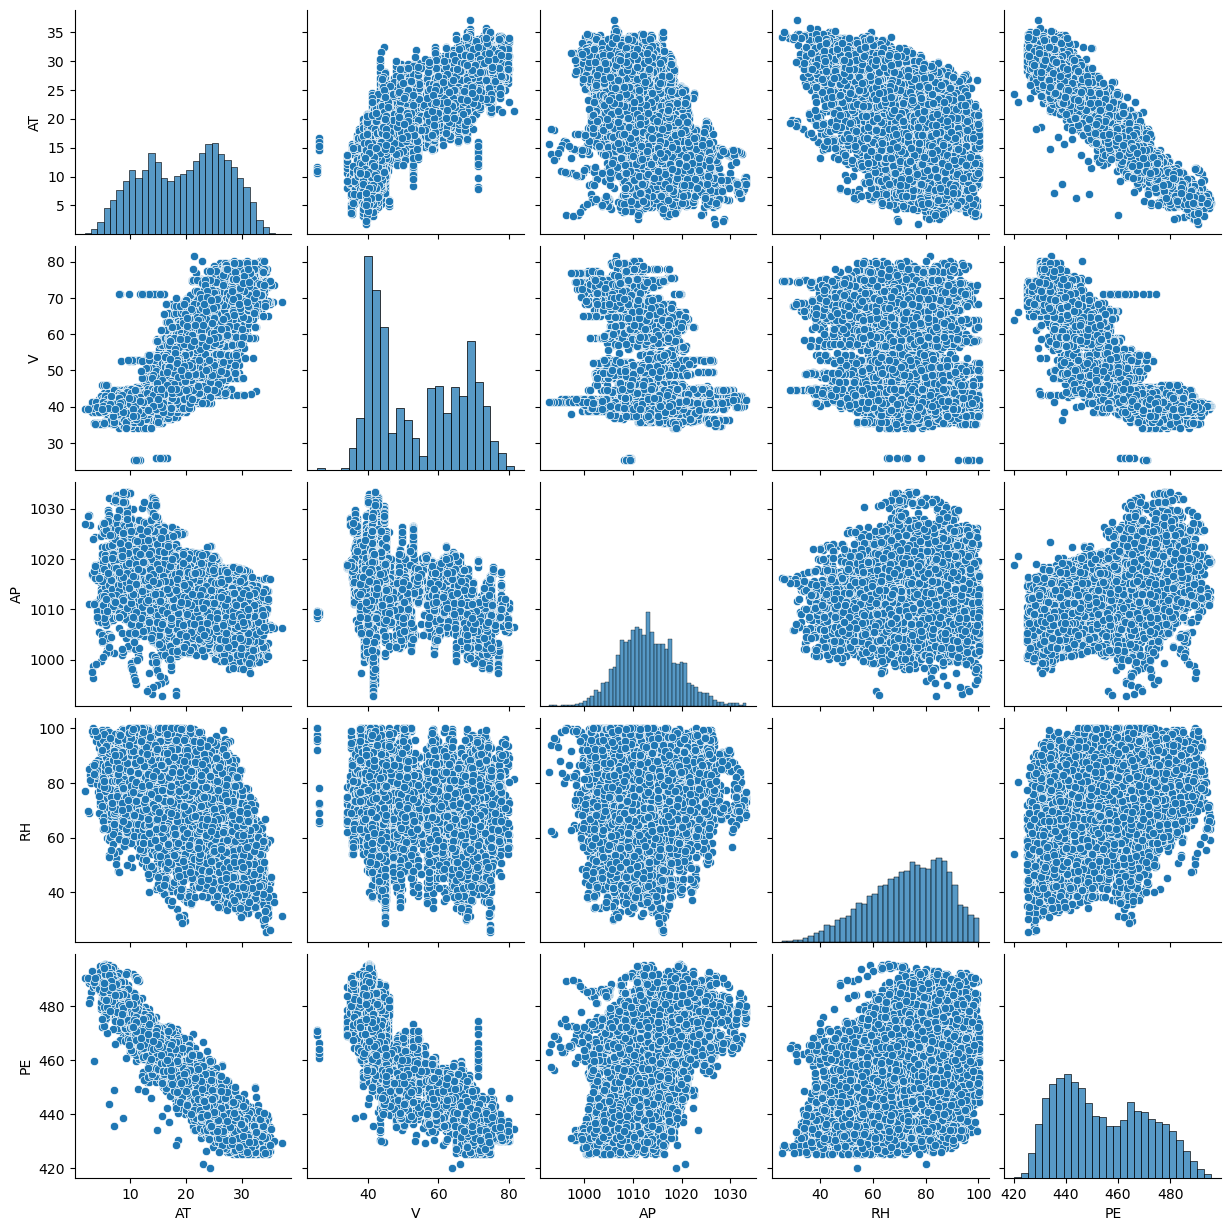

In [8]:
sns.pairplot(data=data)

----------------------------------------------------------------------------------------------------------------------------------
iii. What are the mean, the median, range, first and third quartiles, and in- terquartile ranges of each of the variables in the dataset? Summarize them in a table.

In [9]:
print('Summary:')
print()
print(data.describe())

Summary:

                AT            V           AP           RH           PE
count  9568.000000  9568.000000  9568.000000  9568.000000  9568.000000
mean     19.651231    54.305804  1013.259078    73.308978   454.365009
std       7.452473    12.707893     5.938784    14.600269    17.066995
min       1.810000    25.360000   992.890000    25.560000   420.260000
25%      13.510000    41.740000  1009.100000    63.327500   439.750000
50%      20.345000    52.080000  1012.940000    74.975000   451.550000
75%      25.720000    66.540000  1017.260000    84.830000   468.430000
max      37.110000    81.560000  1033.300000   100.160000   495.760000


----------------------------------------------------------------------------------------------------------------------------------
My Findings:

AT and V have a linear relation with PE and also they have a significant correlation. RH and AP have a polynomial relation with PE.

----------------------------------------------------------------------------------------------------------------------------------
(c) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?

In [10]:
import matplotlib.pyplot as plt

def plot_outliers(regression_model, data, feature_column, threshold=3):
    influence = regression_model.get_influence()

    standardized_residuals = influence.resid_studentized_internal

    is_outlier = abs(standardized_residuals) >= threshold

    outlier_count = sum(is_outlier)

    print("===============================================")
    print(f"Number of outliers for {feature_column}: {outlier_count}")

    plt.figure(figsize=(10, 6))
    plt.scatter(data[feature_column], standardized_residuals, alpha=0.7, label="Data Points")
    
    plt.scatter(data[feature_column][is_outlier], standardized_residuals[is_outlier], color='red', label="Outliers")

    plt.xlabel(feature_column)
    plt.ylabel("Standardized Residuals")
    plt.title(f"Outliers Detection for {feature_column}")
    plt.legend()
    plt.show()


Regression Summary for AT:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Wed, 07 Feb 2024   Prob (F-statistic):               0.00
Time:                        17:29:03   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341   

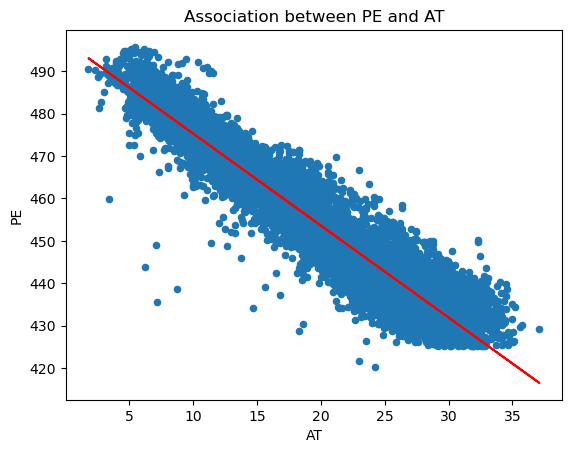

Number of outliers for AT: 42


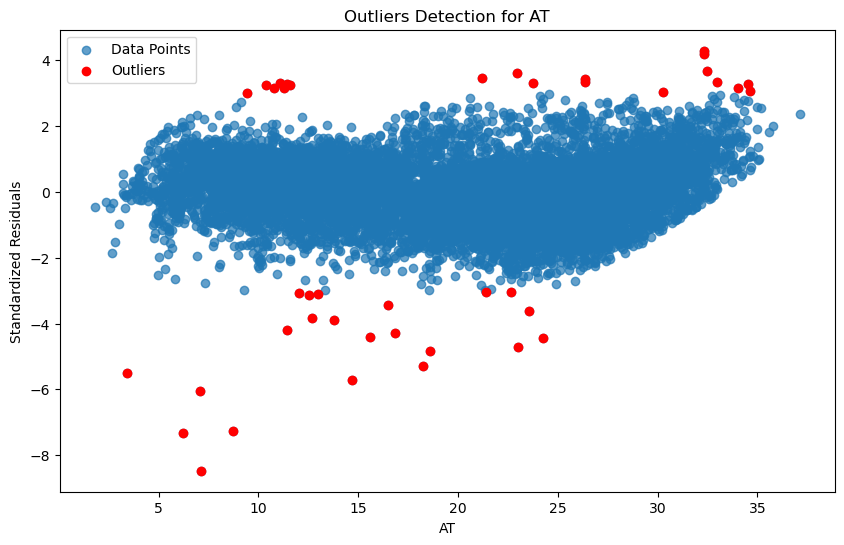


Regression Summary for V:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Wed, 07 Feb 2024   Prob (F-statistic):               0.00
Time:                        17:29:03   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.8015    

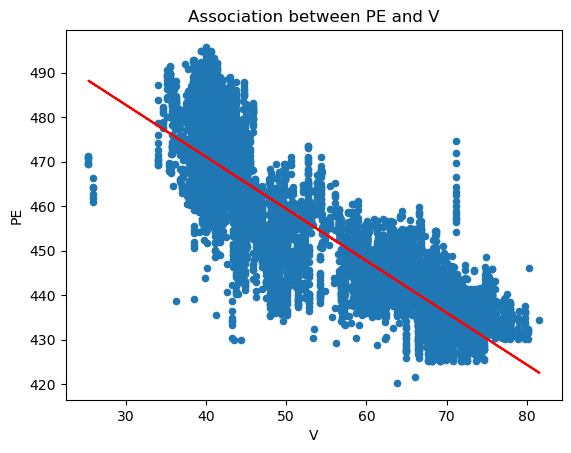

Number of outliers for V: 33


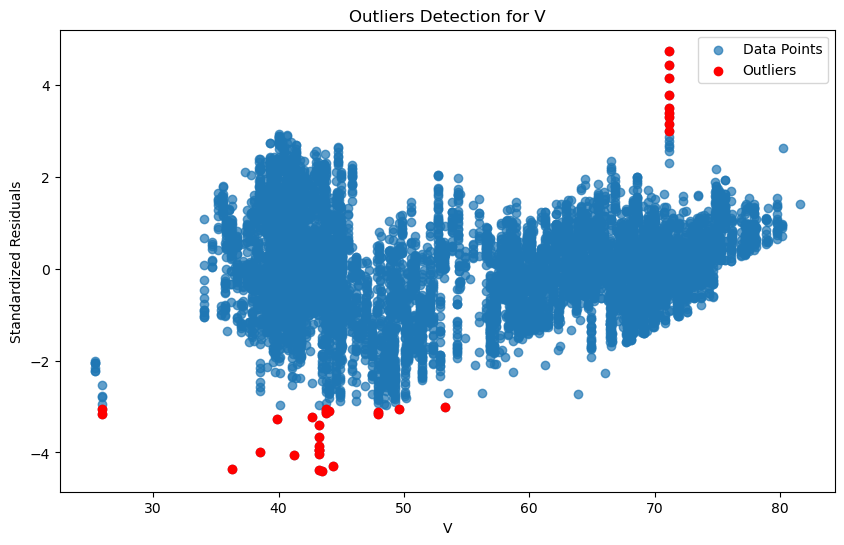


Regression Summary for AP:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Wed, 07 Feb 2024   Prob (F-statistic):               0.00
Time:                        17:29:03   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.2610   

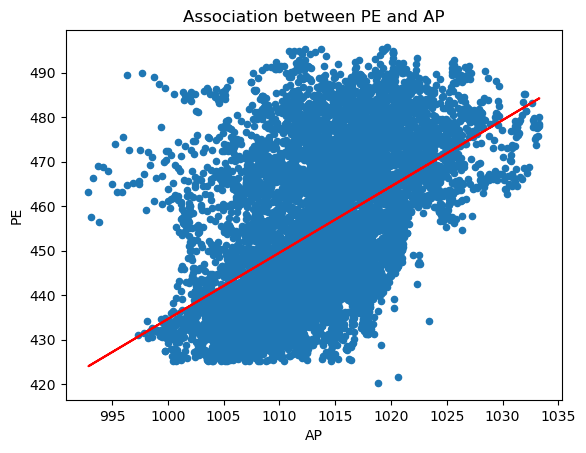

Number of outliers for AP: 29


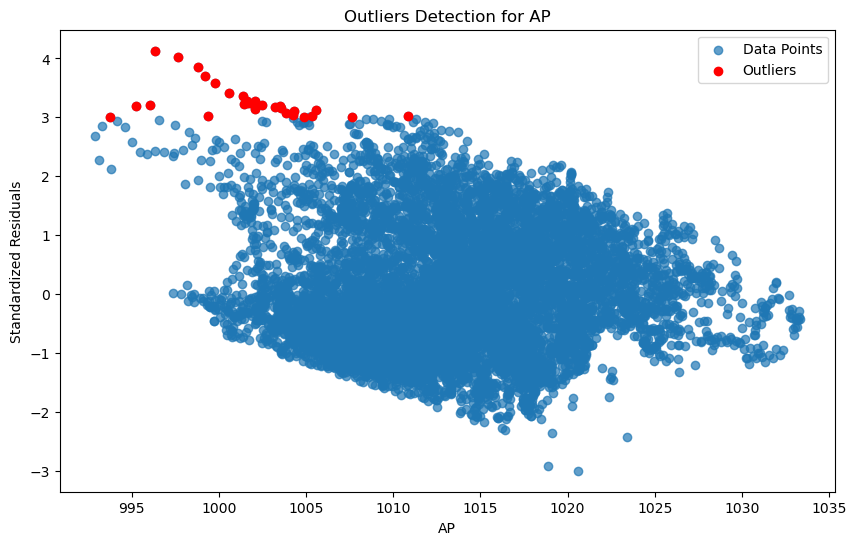


Regression Summary for RH:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Wed, 07 Feb 2024   Prob (F-statistic):               0.00
Time:                        17:29:04   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.9618   

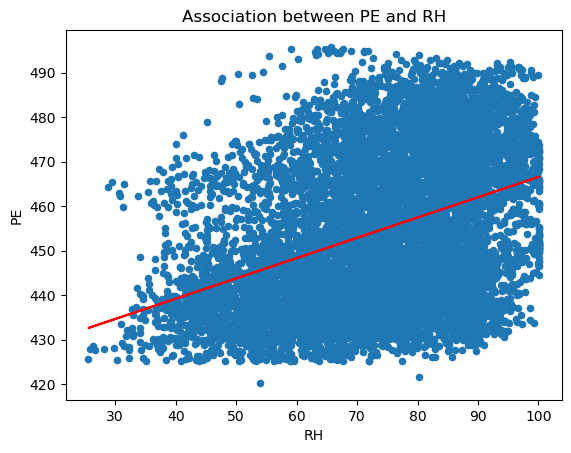

Number of outliers for RH: 2


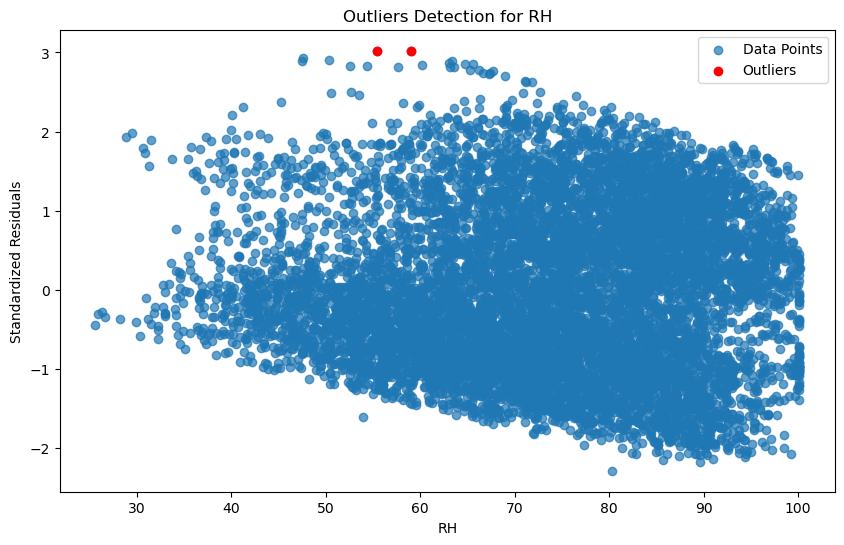

In [11]:
predictors = ['AT', 'V', 'AP', 'RH']
x_coeff = []

for predictor in predictors:
    X = sms.add_constant(data[predictor])
    model = sms.OLS(data['PE'], X).fit()

    print(f"\nRegression Summary for {predictor}:")
    print(model.summary())

    p = model.t_test([1, 0]).pvalue
    if p < 0.05:
        print(f"\nStatistically significant association for {predictor} (p-value: {p:.4f})")

    data.plot.scatter(x=predictor, y='PE')
    plt.plot(data[predictor], model.predict(X), color='red')
    plt.xlabel(predictor)
    plt.ylabel("PE")
    plt.title(f"Association between PE and {predictor}")
    plt.show()

    plot_outliers(model, data, predictor)

    x_coeff.append(model.params[1])

----------------------------------------------------------------------------------------------------------------------------------
(d) Fit a multiple regresmsion model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 :βj =0?

In [12]:
X = sms.add_constant(data.iloc[:,:4])
model = sms.OLS(data['PE'], X).fit()
print(model.summary())

significant_predictors = [predictor for predictor, p in zip(X.columns, model.pvalues[1:]) if p < 0.05]
print()
print("Statistically Significant predictors with less p-values:", significant_predictors)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Wed, 07 Feb 2024   Prob (F-statistic):               0.00
Time:                        17:30:58   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

In [13]:
y_coeff=model.params[1:]
y_coeff.reset_index(inplace=True, drop=True)

----------------------------------------------------------------------------------------------------------------------------------
(e) How do your results from 1c compare to your results from 1d? Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

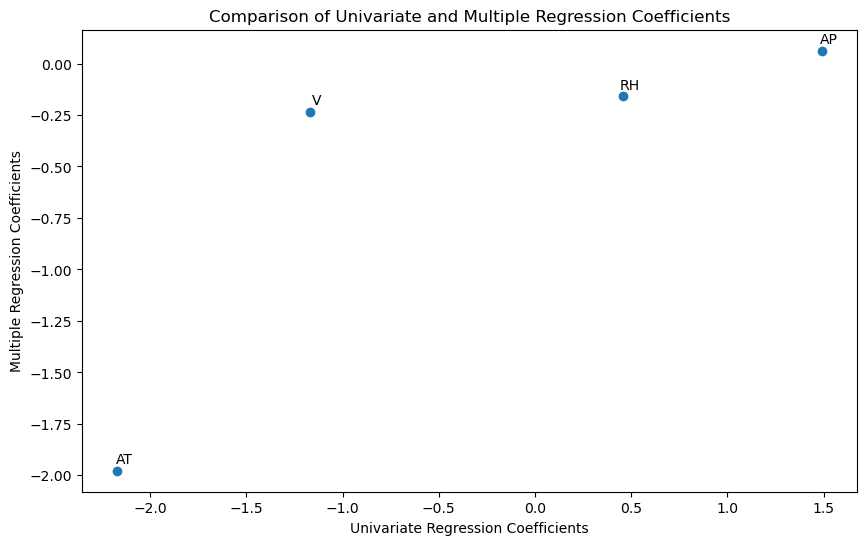

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(x_coeff, y_coeff)

plt.xlabel("Univariate Regression Coefficients")
plt.ylabel("Multiple Regression Coefficients")
plt.title("Comparison of Univariate and Multiple Regression Coefficients")


for i, txt in enumerate(predictors):
    plt.annotate(txt, (x_coeff[i], y_coeff[i]), textcoords="offset points", xytext=(5,5), ha='center')

plt.show()

----------------------------------------------------------------------------------------------------------------------------------
(f) Is there evidence of nonlinear asmsociation between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form2
Y =β0 +β1X+β2X2 +β3X3 +ε


Polynomial Regression Summary for AT:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Sun, 04 Feb 2024   Prob (F-statistic):               0.00
Time:                        19:24:32   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        

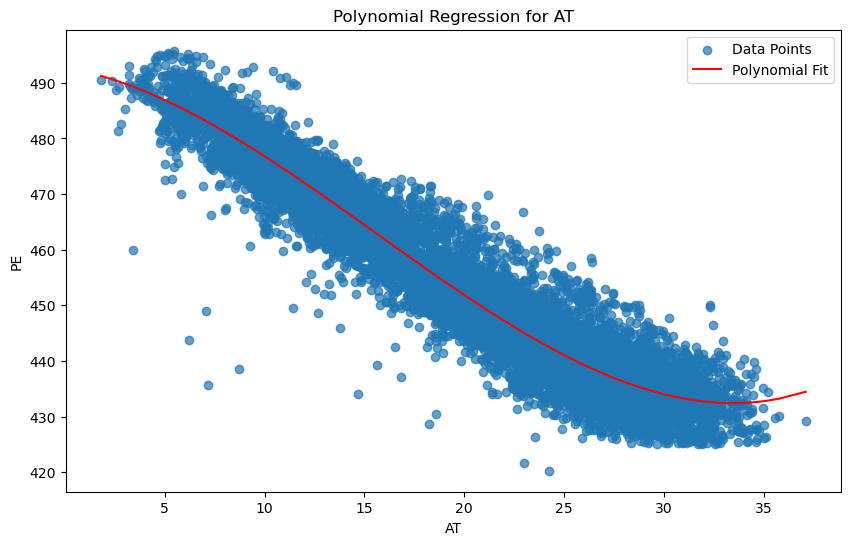


Polynomial Regression Summary for V:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Sun, 04 Feb 2024   Prob (F-statistic):               0.00
Time:                        19:24:32   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        5

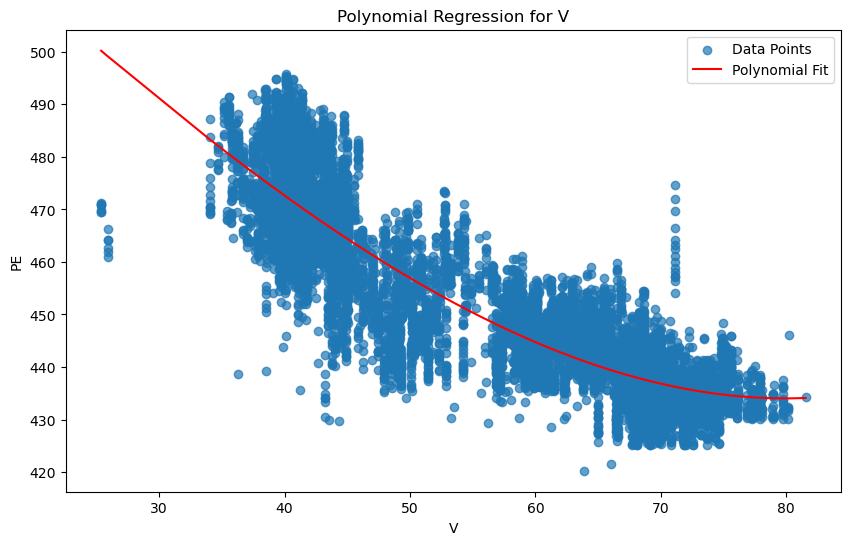


Polynomial Regression Summary for AP:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Sun, 04 Feb 2024   Prob (F-statistic):               0.00
Time:                        19:24:32   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        

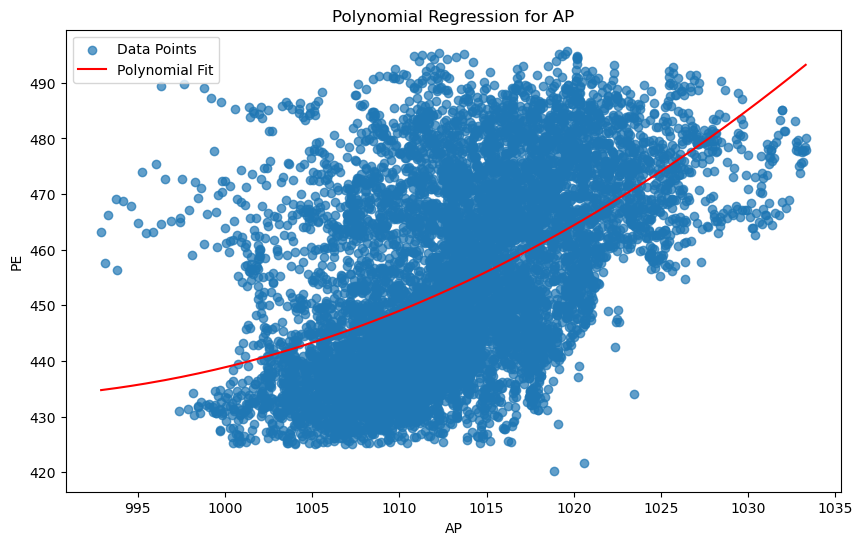


Polynomial Regression Summary for RH:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Sun, 04 Feb 2024   Prob (F-statistic):               0.00
Time:                        19:24:33   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        

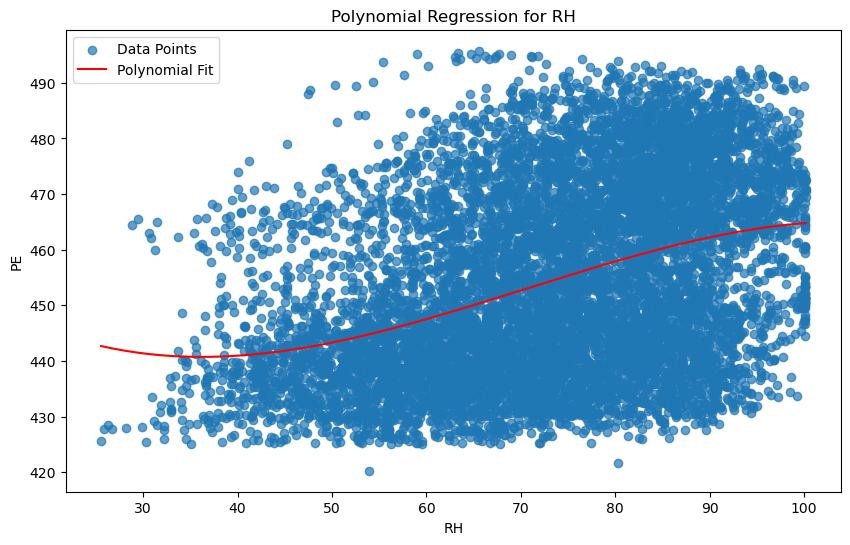

In [123]:
for predictor in predictors:
    X = data[predictor]
    Y = data['PE']

    poly_features = PolynomialFeatures(degree=3)
    X_poly = poly_features.fit_transform(X.values.reshape(-1, 1))

    X_poly = sms.add_constant(X_poly)

    model = sms.OLS(Y, X_poly).fit()

    print(f"\nPolynomial Regression Summary for {predictor}:")
    print(model.summary())

    plt.figure(figsize=(10, 6))
    plt.scatter(X, Y, alpha=0.7, label="Data Points")
    
    sort_order = np.argsort(X)
    plt.plot(X[sort_order], model.predict(X_poly[sort_order]), color='red', label="Polynomial Fit")

    plt.xlabel(predictor)
    plt.ylabel("PE")
    plt.title(f"Polynomial Regression for {predictor}")
    plt.legend()
    plt.show()

There exists a non linear association between all the pairs because of non-linear terms with less p-values

----------------------------------------------------------------------------------------------------------------------------------
(g) Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant.

In [126]:
interaction_terms = pd.DataFrame()

for i in range(len(predictors)):
    for j in range(i+1, len(predictors)):
        interaction_term_name = f"{predictors[i]}_{predictors[j]}"
        interaction_terms[interaction_term_name] = data[predictors[i]] * data[predictors[j]]

X_interactions = pd.concat([data[predictors], interaction_terms], axis=1)

X_interactions = sms.add_constant(X_interactions)

model_interactions = sms.OLS(data['PE'], X_interactions).fit()

print("Linear Regression Model with Interaction Terms Summary:")
print(model_interactions.summary())

Linear Regression Model with Interaction Terms Summary:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Sun, 04 Feb 2024   Prob (F-statistic):               0.00
Time:                        19:30:06   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

Terms 'AT*V', 'AT*RH', 'V*AP', 'AP*RH' are statistically significant

----------------------------------------------------------------------------------------------------------------------------------
(h) Can you improve your model using possible interaction terms or nonlinear asso- ciations between the predictors and response? Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regres- sion model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs.

In [136]:
interaction_terms = pd.DataFrame()
quadratic_terms = pd.DataFrame()

for i in range(len(predictors)):
    for j in range(i + 1, len(predictors)):
        interaction_term_name = f"{predictors[i]}_{predictors[j]}"
        interaction_terms[interaction_term_name] = data[predictors[i]] * data[predictors[j]]

for predictor in predictors:
    quadratic_term_name = f"{predictor}_squared"
    quadratic_terms[quadratic_term_name] = data[predictor] ** 2

X_combined = pd.concat([data[predictors], interaction_terms, quadratic_terms], axis=1)
X_combined = sms.add_constant(X_combined)

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X_combined, data['PE'], test_size=0.3, random_state=42)
print(X_train,X_test, y_train, y_test)
model_all_predictors = sms.OLS(y_train, X_train).fit()

significant_predictors = [predictor for predictor, p in zip(X_train.columns, model_all_predictors.pvalues) if p < 0.05]

X_train_filtered = X_train[significant_predictors]
X_test_filtered = X_test[significant_predictors]
model_filtered = sms.OLS(y_train, X_train_filtered).fit()

y_train_pred_all = model_all_predictors.predict(X_train)
y_test_pred_all = model_all_predictors.predict(X_test)

y_train_pred_filtered = model_filtered.predict(X_train_filtered)
y_test_pred_filtered = model_filtered.predict(X_test_filtered)

      const     AT      V       AP     RH       AT_V       AT_AP      AT_RH  \
8759    1.0  16.69  44.78  1010.41  58.18   747.3782  16863.7429   971.0242   
1434    1.0  24.12  58.66  1011.55  58.96  1414.8792  24398.5860  1422.1152   
7320    1.0   9.08  40.02  1031.20  75.34   363.3816   9363.2960   684.0872   
2579    1.0   9.60  41.82  1032.93  72.63   401.4720   9916.1280   697.2480   
9142    1.0  20.77  56.85  1012.40  83.63  1180.7745  21027.5480  1736.9951   
...     ...    ...    ...      ...    ...        ...         ...        ...   
5734    1.0  23.39  61.87  1010.35  48.91  1447.1393  23632.0865  1144.0049   
5191    1.0  11.63  40.55  1022.89  87.12   471.5965  11896.2107  1013.2056   
5390    1.0  27.79  69.23  1012.86  45.71  1923.9017  28147.3794  1270.2809   
860     1.0  12.26  41.50  1014.87  89.41   508.7900  12442.3062  1096.1666   
7270    1.0  11.75  40.55  1018.09  97.70   476.4625  11962.5575  1147.9750   

            V_AP       V_RH       AP_RH  AT_squared

In [138]:
mse_train_all = mean_squared_error(y_train, y_train_pred_all)
mse_test_all = mean_squared_error(y_test, y_test_pred_all)

mse_train_filtered = mean_squared_error(y_train, y_train_pred_filtered)
mse_test_filtered = mean_squared_error(y_test, y_test_pred_filtered)

In [153]:
print("Model with All Predictors:")
print(f"Train MSE: {mse_train_all:.4f}")
print(f"Test MSE: {mse_test_all:.4f}")
linear_reg={'mse_train_all':mse_train_all, 'mse_test_all':mse_test_all}

print("\nModel with Filtered Predictors:")
print(f"Train MSE: {mse_train_filtered:.4f}")
print(f"Test MSE: {mse_test_filtered:.4f}")
linear_reg_filtered={'mse_train_filtered':mse_train_filtered, 'mse_test_filtered':mse_test_filtered}

Model with All Predictors:
Train MSE: 17.8878
Test MSE: 18.6473

Model with Filtered Predictors:
Train MSE: 18.4572
Test MSE: 19.2210


----------------------------------------------------------------------------------------------------------------------------------
(i) KNN Regression:
i. Perform k-nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k ∈ {1,2,...,100} that gives you the best fit. Plot the train and test errors in terms of 1/k.

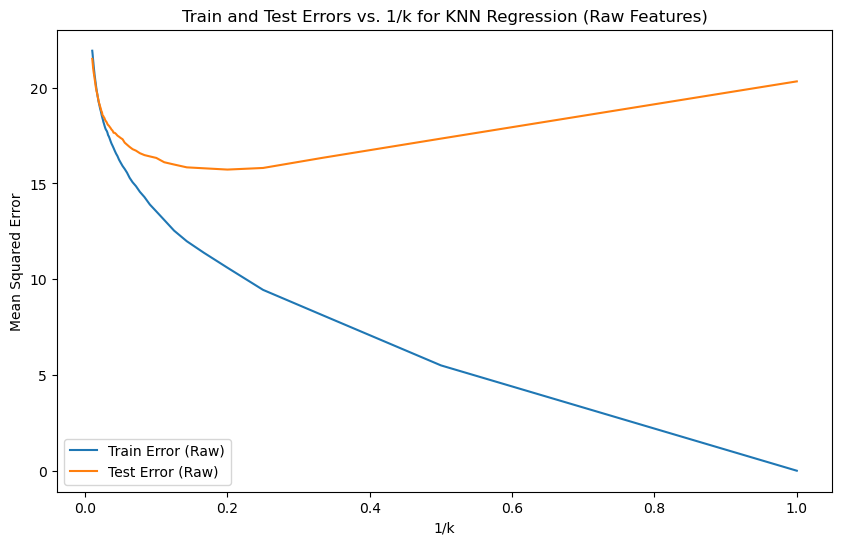

The best value of k for raw features is 5 with a test error of 15.7268


In [157]:
X_raw = data[predictors]
y = data['PE']
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_raw, y, test_size=0.3, random_state=42)
k_values = range(1, 101)
best_k_raw = None
min_test_error_raw = float('inf')

train_errors_raw = []
test_errors_raw = []

for k in k_values:
    knn_model_raw = KNeighborsRegressor(n_neighbors=k)
    knn_model_raw.fit(X_train_raw, y_train)

    y_test_pred_raw = knn_model_raw.predict(X_test_raw)

    test_error_raw = mean_squared_error(y_test, y_test_pred_raw)

    if test_error_raw < min_test_error_raw:
        min_test_error_raw = test_error_raw
        best_k_raw = k

    train_errors_raw.append(mean_squared_error(y_train, knn_model_raw.predict(X_train_raw)))
    test_errors_raw.append(test_error_raw)

plt.figure(figsize=(10, 6))
plt.plot(1 / np.array(k_values), train_errors_raw, label='Train Error (Raw)')
plt.plot(1 / np.array(k_values), test_errors_raw, label='Test Error (Raw)')
plt.xlabel('1/k')
plt.ylabel('Mean Squared Error')
plt.title('Train and Test Errors vs. 1/k for KNN Regression (Raw Features)')
plt.legend()
plt.show()

knn_raw = {
    'train_mse': min(train_errors_raw),
    'test_mse': min(test_errors_raw),
    'best_k': best_k_raw
}

print(f"The best value of k for raw features is {best_k_raw} with a test error of {min_test_error_raw:.4f}")

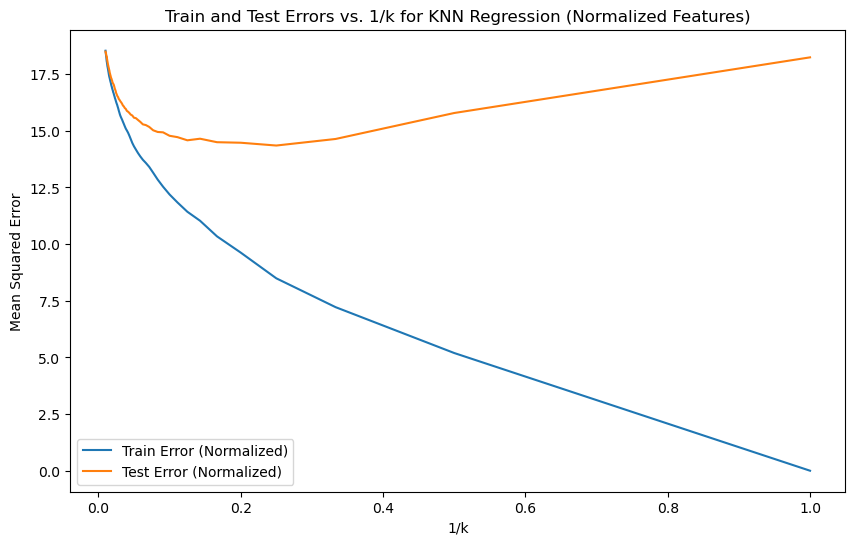

The best value of k for normalized features is 4 with a test error of 14.3487


In [158]:
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X_raw)

X_train_normalized, X_test_normalized, _, _ = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

best_k_normalized = None
min_test_error_normalized = float('inf')

train_errors_normalized = []
test_errors_normalized = []

for k in k_values:
    knn_model_normalized = KNeighborsRegressor(n_neighbors=k)
    knn_model_normalized.fit(X_train_normalized, y_train)

    y_test_pred_normalized = knn_model_normalized.predict(X_test_normalized)

    test_error_normalized = mean_squared_error(y_test, y_test_pred_normalized)

    if test_error_normalized < min_test_error_normalized:
        min_test_error_normalized = test_error_normalized
        best_k_normalized = k

    train_errors_normalized.append(mean_squared_error(y_train, knn_model_normalized.predict(X_train_normalized)))
    test_errors_normalized.append(test_error_normalized)

plt.figure(figsize=(10, 6))
plt.plot(1 / np.array(k_values), train_errors_normalized, label='Train Error (Normalized)')
plt.plot(1 / np.array(k_values), test_errors_normalized, label='Test Error (Normalized)')
plt.xlabel('1/k')
plt.ylabel('Mean Squared Error')
plt.title('Train and Test Errors vs. 1/k for KNN Regression (Normalized Features)')
plt.legend()
plt.show()

knn_normalized = {
    'train_mse': min(train_errors_normalized),
    'test_mse': min(test_errors_normalized),
    'best_k': best_k_raw
}

print(f"The best value of k for normalized features is {best_k_normalized} with a test error of {min_test_error_normalized:.4f}")

----------------------------------------------------------------------------------------------------------------------------------
(j) Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis.

In [159]:
print("Linear regression with all predictors", linear_reg)
print("=================================================================")
print("Linear regression with statistically significant predictors", linear_reg_filtered)
print("=================================================================")
print("KNN Regression with raw features", knn_raw)
print("=================================================================")
print("KNN Regression with normalized features", knn_normalized)

Linear regression with all predictors {'mse_train_all': 17.88779961663358, 'mse_test_all': 18.647312478589388}
Linear regression with statistically significant predictors {'mse_train_filtered': 18.457177417725557, 'mse_test_filtered': 19.22101895493981}
KNN Regression with raw features {'train_mse': 0.0, 'test_mse': 15.726819842563568, 'best_k': 5}
KNN Regression with normalized features {'train_mse': 0.0, 'test_mse': 14.348653474399166, 'best_k': 5}


In [162]:
min_test_error_linear = mse_test_filtered
print("\nLinear Regression with Filtered Predictors:")
print(f"Smallest Test MSE: {min_test_error_linear:.4f}")

min_test_error_knn_raw = min(test_errors_raw)
min_test_error_knn_normalized = min(test_errors_normalized)

best_k_linear = best_k_normalized if min_test_error_knn_normalized < min_test_error_knn_raw else best_k_raw

print("\nKNN Regression Models:")
print(f"Smallest Test MSE for Raw Features: {min_test_error_knn_raw:.4f}")
print(f"Smallest Test MSE for Normalized Features: {min_test_error_knn_normalized:.4f}")
print(f"Best k for KNN Regression: {best_k_linear}")

if min_test_error_linear < min_test_error_knn_raw and min_test_error_linear < min_test_error_knn_normalized:
    print("\nLinear Regression with Filtered Predictors is preferred.")
else:
    print("\nKNN Regression with the best k value is preferred.")



Linear Regression with Filtered Predictors:
Smallest Test MSE: 19.2210

KNN Regression Models:
Smallest Test MSE for Raw Features: 15.7268
Smallest Test MSE for Normalized Features: 14.3487
Best k for KNN Regression: 4

KNN Regression with the best k value is preferred.


----------------------------------------------------------------------------------------------------------------------------------
2. ISLR: 2.4.1
(a) The sample size n is extremely large, and the number of predictors p is small.
(b) The number of predictors p is extremely large, and the number of observations n is small.

Ans: A flexible statistical model performs worse than an inflexible model.

----------------------------------------------------------------------------------------------------------------------------------
(c) The relationship between the predictors and response is highly non-linear.

Ans: A flexible statistical model can understand the non-linearities and fit the data.

----------------------------------------------------------------------------------------------------------------------------------
(d) The variance of the error terms, i.e. $σ^2$ = Var(ε), is extremely high.

Ans: A flexible statistical model will understand thE noise and overfit the data making a bad prediction.

----------------------------------------------------------------------------------------------------------------------------------
3. ISLR: 2.4.7 (a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

In [18]:
df = pd.DataFrame({'X1':[0,2,0,0,-1,1],'X2':[3,0,1,1,0,1], 'X3':[0,0,3,2,1,1],'Y':["Red", "Red", "Red", "Green", "Green", "Red"]} )
print(df)

   X1  X2  X3      Y
0   0   3   0    Red
1   2   0   0    Red
2   0   1   3    Red
3   0   1   2  Green
4  -1   0   1  Green
5   1   1   1    Red


----------------------------------------------------------------------------------------------------------------------------------
(b) What is our prediction with K = 1? Why?

In [22]:
test_point =[0,0,0]
for index,row in df.iterrows():
  l = [row['X1'],row['X2'],row['X3']]
  print("Euclidean distance: ",l, " ", np.linalg.norm(np.array(li)-np.array(test_point)))

Euclidean distance:  [0, 3, 0]   1.7320508075688772
Euclidean distance:  [2, 0, 0]   1.7320508075688772
Euclidean distance:  [0, 1, 3]   1.7320508075688772
Euclidean distance:  [0, 1, 2]   1.7320508075688772
Euclidean distance:  [-1, 0, 1]   1.7320508075688772
Euclidean distance:  [1, 1, 1]   1.7320508075688772


There is a less Euclidean distance (1.4) with point (-1,0,1) with (0,0,0). So, that is the first nearest neighbor that would be picked.

----------------------------------------------------------------------------------------------------------------------------------
(c) What is our prediction with K = 3? Why?

The 3 nearest neighbors are (-1,0,1) with Green, (1,1,1) with Red, (2,0,0) with Red. As maximum number of samples are red, prediction by KNN is made as Red. 

----------------------------------------------------------------------------------------------------------------------------------
(d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?

If K is large, then points under decision are really close, so a linear model is suitable. For a non-linear model, k is small.